<a href="https://colab.research.google.com/github/Sadiq422/Data-science-/blob/main/Machine_Learning_%C3%9Cbungen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Übungen - Machine Learning**

## **Week 1: Einführung in maschinelles Lernen & Data-Vorbereitung**


### **Übung 1: Feature-Vorbereitung am Adult Income Dataset**


Wir wenden nun alle **5 Schritte der Feature-Vorbereitung** auf einen neuen Datensatz an:  
den **UCI Adult Income Dataset (Census Income)**.

🎯 **Ziel:**  
Vorhersagen, ob eine Person **>50K** oder **≤50K** pro Jahr verdient.

<br>

**Über den Datensatz**

- **Größe:** ~32.000 Zeilen, 15 Spalten  
- **Zielspalte:** `income` (`>50K` oder `<=50K`)  
- **Besonderheit:** Fehlende Werte werden im Original mit `" ?"` dargestellt – wir konvertieren sie zu `NaN`.

<br>


---


<br>

**Daten laden:**

```python
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age","workclass","fnlwgt","education","education-num","marital-status",
    "occupation","relationship","race","sex","capital-gain","capital-loss",
    "hours-per-week","native-country","income"
]

df = pd.read_csv(url, names=columns, na_values=" ?", sep=",\s", engine="python")
df.head()
```

💡 **Hinweis:**  
Die Zeichen `" ?"` werden automatisch durch `NaN` ersetzt.

<br>


---


<br>

**Aufgaben**

Deine Aufgabe ist es, die **5 Schritte der Feature-Vorbereitung** auf diesen Datensatz anzuwenden.  
Arbeite dabei schrittweise und dokumentiere deine Entscheidungen.

<br>

**Importe**

In [ ]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Damit DF in Print-Befehlen nicht als String ausgegeben wird

**Daten laden**

In [ ]:
# URL der Daten
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age","workclass","fnlwgt","education","education-num","marital-status",
    "occupation","relationship","race","sex","capital-gain","capital-loss",
    "hours-per-week","native-country","income"
]

# Daten laden
df = pd.read_csv(url, names=columns, na_values="?", sep=",\\s", engine="python")

# Die ersten 5 Datensätze anzeigen
df.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**🔹 Schritt 1: Umgang mit fehlenden Werten**

- Identifiziere, welche Spalten fehlende Werte enthalten.  
- Entscheide: **Zeilen/Spalten löschen** oder **Werte imputieren (ersetzen)?**  
- Wenn imputiert wird:  
- Welche Strategie für **numerische** vs. **kategoriale** Features ist sinnvoll?

<br>

In [ ]:
# Fehlende Werte prüfen
display(df.isnull().sum())

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
# zeigen fehlender werte in Prozent ...
display((df.isnull().mean()*100).round(2))

,0
age,0.00
workclass,5.64
fnlwgt,0.00
education,0.00
education-num,0.00
marital-status,0.00
occupation,5.66
relationship,0.00
race,0.00
sex,0.00


In [ ]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

**🔹 Schritt 2: Umgang mit Ausreißern**  

- Untersuche die **numerischen Features**.  
- Nutze **Zusammenfassungsstatistiken** und **Visualisierungen** (Histogramme, Boxplots), um extreme Werte zu erkennen.  
- Wende z. B. die **IQR-Methode** an, um Schwellenwerte zu bestimmen.  
- Entscheide: **Entfernen**, **Begrenzen** oder **Transformieren**?

<br>

In [ ]:
# Spalten auswählen
strings_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]

# Spalten konvertieren
for col in strings_cols:
  df[col] = df[col].astype("string")

# Prüfung
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  string
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  string
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  string
 6   occupation      32561 non-null  string
 7   relationship    32561 non-null  string
 8   race            32561 non-null  string
 9   sex             32561 non-null  string
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  string
 14  income          32561 non-null  string
dtypes: int64(6), string(9)
memory usage: 3.7 MB


In [ ]:
display(df.head(50))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


<Axes: xlabel='age'>

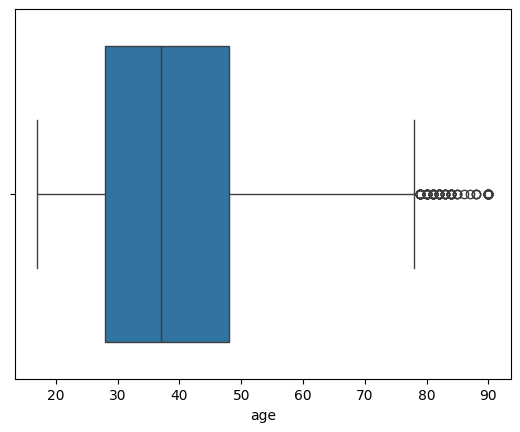

In [ ]:
# Ausreißer visualisieren
sns.boxplot(x=df["age"])

**🔹 Schritt 3: Umgang mit kategorialen Daten**  

- Finde alle **kategorialen Features**.  
- Wandle sie in numerische Form um (z. B. mit `pd.get_dummies()` oder `OneHotEncoder`).  
- **Reflektiere:** Welche Methode würdest du in der Produktion verwenden – und warum?

<br>

**🔹 Schritt 4: Feature-Skalierung**  

- Wähle mehrere **numerische Features** aus.  
- Wende verschiedene **Skalierungsmethoden** an:  
  - Min-Max-Skalierung  
  - Standardisierung  
- Vergleiche Werte **vor und nach der Skalierung**.  
- Welche Methode erscheint hier **am geeignetsten**?

<br>

**🔹 Schritt 5: Feature Engineering**  

- Erstelle mindestens **zwei neue Features**, die bei der Einkommensvorhersage helfen könnten.  
- Denke an:
  - Kombinationen vorhandener Variablen  
  - Transformationen (z. B. log, Interaktionen)  
  - Gruppierungen (z. B. Altersgruppen, Arbeitsstunden-Kategorien)  
- **Erkläre:** Warum könnten diese neuen Features hilfreich sein?

<br>

**Ergebnisse / Deliverables**

Am Ende deiner Übung solltest du ein **Jupyter Notebook oder Google Colab** haben mit:

- 💻 Deinem Code für **jeden der 5 Schritte**  
- 🧠 **Klaren Entscheidungen** bei jedem Schritt  
  *(löschen, auffüllen, skalieren, kodieren, transformieren usw.)*  
- 📊 Einem **sauberen, vorbereiteten Datensatz**, der bereit für das Modellieren ist

<br>

**Reflexionsfragen**

- Welcher Schritt war **am herausforderndsten** – und warum?  
- Welche Features erwartest du als **stärkste Prädiktoren** für das Einkommen?  
- Hat der Umgang mit **Ausreißern** dein Verständnis des Datensatzes verändert?

<br>

> 🧩 **Mini-Projekt:**  
> Du bist jetzt verantwortlich für deinen Datenvorbereitungsprozess –  
> untersuche, entscheide und dokumentiere jeden Schritt wie ein echter Data Scientist!

<br>

---

<br>



---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

### **Übung 2: Baue ein logistisches Regressionsmodell für das Adult Income Dataset**

<br>

Wir bringen nun **alles zusammen**:  
Nach der **Datenvorverarbeitung** trainieren und evaluieren wir unser **erstes Klassifikationsmodell** auf dem **UCI Adult Income Dataset**.

🎯 **Ziel:**  
Vorhersagen, ob eine Person

**mehr als 50.000 $ (>50K)**  

oder

**höchstens 50.000 $ (<=50K)** pro Jahr verdient.

<br>

---

<br>

**1️⃣ Datensatz laden und vorbereiten**

Fahre mit dem Notebook fort, das du in der **Vorverarbeitungsübung** erstellt hast.  
Das umfasst:

- Lade den Datensatz in ein **Pandas DataFrame**.  
- Ersetze `" ?"` durch `NaN`.  
- Führe die gleichen **Vorverarbeitungsschritte** durch, die du gelernt hast:  
  - Fehlende Werte behandeln  
  - Ausreißer behandeln (falls nötig)  
  - **Kategoriale Variablen kodieren**  
    - *OneHotEncoder* für nominale Features  
    - *Label-/Ordinal-Encoding* für geordnete Features (falls vorhanden)  
  - **Numerische Features skalieren**  
- Entferne bei Bedarf **irrelevante Features**



<br>

**2️⃣ Features und Ziel definieren**

- **Features:** Alle nützlichen Spalten (numerisch und kategorial, nach der Kodierung).  
- **Ziel (Target):** Spalte `income`  
  - `<=50K` → 0  
  - `>50K` → 1  



<br>

**3️⃣ Train-Test-Split**

  - Teile den Datensatz in **Trainings- und Testdaten (80/20)** auf.
  - Stelle sicher, dass **beide Datensätze denselben Feature-Satz** haben.



<br>

**4️⃣ Modell trainieren**

  - Verwende **Logistische Regression** als dein erstes überwachtes Lernmodell
  - Das Modell ist nun **trainiert** und bereit, Vorhersagen zu treffen.


<br>

**5️⃣ Vorhersagen treffen**

- **Labels (0/1) vorhersagen**
- **Wahrscheinlichkeiten** vorhersagen  
  (für spätere Analysen zu Schwellenwerten)

<br>

**6️⃣ Modell evaluieren**

- Berechne zunächst nur die **Genauigkeit (Accuracy)** auf dem Testdatensatz
- Drucke aus
  - Genauigkeit in Prozent
  - Eine kleine Stichprobe von Vorhersagen vs. tatsächlichen Werten (z. B. head() eines DataFrames).



<br>

💡 **Challenge: Denk darüber nach**

Wenn du die **Genauigkeit** berechnet hast, überlege Folgendes:

> Wenn der Datensatz **unausgewogen** ist (z. B. viel mehr Personen verdienen <=50K),  
> reicht die **Accuracy allein** aus, um die Modellleistung realistisch zu bewerten?

Diese Frage ist entscheidend —  
und wir werden sie in der **nächsten Lektion** beantworten,  
wenn wir **Precision**, **Recall** und die **Confusion Matrix** kennenlernen. 🧠

<br>

---

<br>




---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

## **Week 2: Supervised Machine Learning**


### **Übung 3: Bewertung des Adult-Income-Modells**


Lassen Sie uns die Übung von letzter Woche fortsetzen.  
Sie haben bereits:  
- den **UCI-Adult-Income-Datensatz** vorverarbeitet und  
- Ihr erstes **Klassifikationsmodell** trainiert.

Jetzt ist es an der Zeit, das Modell mithilfe der **Klassifikationsmetriken** zu bewerten, die wir gerade gelernt haben:

- **Accuracy** (bereits erledigt)  
- **Precision**  
- **Recall**  
- **F1-Score**  
- **ROC-Kurve und AUC**

<br>

**Ihre Aufgabe**  
> - Berechnen Sie alle oben genannten **Metriken** für Ihr Modell.  
> - **Vergleichen Sie** die Werte: Erzählen sie die gleiche Geschichte, oder zeigen einige Metriken Schwächen auf, die **Accuracy allein** möglicherweise verbirgt?  
> - **Interpretieren Sie** die Ergebnisse in einfacher Sprache (z. B. „Das Modell identifiziert X % der Besserverdienenden korrekt, erzeugt jedoch Y % Fehlalarme“).  
> - **Entscheiden Sie**: Welche Metrik ist für dieses Geschäftsproblem am wichtigsten – und warum?

<br>

💡 **Erinnerung**  
> Das Ziel ist es, vorherzusagen, ob eine Person **> 50 K** oder **≤ 50 K** pro Jahr verdient.  
>  
> Überlegen Sie, was in diesem Szenario **am wichtigsten** ist:  
> - Ist es schlimmer, einen tatsächlichen Besserverdiener **nicht vorherzusagen** (*False Negative*)?  
> - Oder jemanden **fälschlicherweise als Besserverdiener** einzustufen, obwohl er es nicht ist (*False Positive*)?





---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

### **Übung 4: Vergleich von Klassifikationsalgorithmen**




Wir arbeiten weiterhin mit dem **UCI Adult Income Dataset**.  
**Ziel:** Vorhersagen, ob eine Person **>50K** oder **<=50K** pro Jahr verdient.  

Bisher hast du ein **Logistic Regression-Modell** trainiert und evaluiert.  
Jetzt ist es Zeit, andere Algorithmen auszuprobieren und zu vergleichen.  

<br>

---

<br>

**Schritt 1. Verschiedene Modelle trainieren**  
Verwende den vorverarbeiteten Datensatz (`X_train`, `X_test`, `y_train`, `y_test`) und trainiere die folgenden Modelle:

- Decision Tree Classifier  
- Random Forest Classifier  
- Support Vector Machine (SVM)  
- K-Nearest Neighbors (KNN)  

👉 Behalte zunächst die **Standardparameter** bei, außer beim **KNN**, hier solltest du unterschiedliche Anzahl an Nachbarn ausprobieren.  

<br>

**Schritt 2. Jedes Modell evaluieren**  
Für jedes Modell:
- Erzeuge Vorhersagen auf dem Testset.  
- Gib die **Accuracy** aus.  
- Gib den **Classification Report** aus (Precision, Recall, F1-Score).  
- Zeige die **Confusion Matrix**.  

<br>

**Schritt 3. Modelle vergleichen**  
Erstelle eine einfache Vergleichstabelle für Accuracy, Precision, Recall und F1-Score aller vier Modelle.  

👉 Beispiel-Tabelle (mit deinen Ergebnissen ausfüllen):

| Modell              | Accuracy | Precision (avg) | Recall (avg) | F1 (avg) |
|----------------------|-----------|-----------------|---------------|-----------|
| Logistic Regression  | ㅤ        | ㅤ              | ㅤ            | ㅤ        |
| Decision Tree        | ㅤ        | ㅤ              | ㅤ            | ㅤ        |
| Random Forest        | ㅤ        | ㅤ              | ㅤ            | ㅤ        |
| SVM                  | ㅤ        | ㅤ              | ㅤ            | ㅤ        |
| KNN                  | ㅤ        | ㅤ              | ㅤ            | ㅤ        |

<br>

**Schritt 4. Ergebnisse interpretieren**  
- Welches Modell performt insgesamt am besten?  
- Welches Modell balanciert Precision und Recall am besten aus?  
- Wenn du ein Modell für dieses Business-Problem deployen müsstest – welches würdest du wählen und warum?  

<br>

☝🏼 **Merke:**  
Im realen Einsatz ist das „beste“ Modell nicht immer nur das mit der höchsten Accuracy.  
Denke an **False Positives vs. False Negatives** und was für diese Vorhersageaufgabe wichtiger ist.  

<br>

---

<br>




---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

### **Übung 5: Vergleich von Regressionsmodellen**


**Datensatz**: Diabetes-Datensatz

**Ziel:**  Vorhersage des Krankheitsverlaufs eines Patienten nach einem Jahr  
→ Das Ziel ist **numerisch**

<br>

**Anleitung:**

1️⃣ Lade den **Diabetes-Datensatz** aus `scikit-learn`.

2️⃣ Teile die Daten in **Trainings-** und **Testmengen** auf.

3️⃣ Trainiere und evaluiere die folgenden **Regressionsmodelle**:

>    - **Lineare Regression**  
>    - **Polynomiale Regression**  
>    - **Entscheidungsbaum-Regression**  
>    - **Random Forest Regression**  
>    - **KNN Regression**

4️⃣ Verwende die Auswertungsfunktion (**MAE**, **MSE**, **RMSE**, **R²**) zur Bewertung.  

5️⃣ Vergleiche die Modelle **systematisch** und interpretiere die Ergebnisse.
> - Welches Modell liefert die beste Leistung?
> - Welches Modell unterfitten / überfitten die Daten?
> - Wie zeigen sich die Vor- und Nachteile der einzelnen Algorithmen in diesem Datensatz?

<br>

---

<br>




---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

### **Übung 6: Hyperparameter abstimmen**

<br>

**Datensatz:** Derselbe **Diabetes-Datensatz**.  
**Ziel:** Die Modellleistung durch **Hyperparameter-Tuning** verbessern.  

<br>

**Anweisungen:**

1. Wähle ein Modell aus der vorherigen Übung (z. B. Decision Tree oder Random Forest).  

2. Verwende **GridSearchCV** oder **RandomizedSearchCV**, um **mindestens drei Hyperparameter** abzustimmen.  
> - Bei **Decision Trees:** versuche mindestens `max_depth`, `min_samples_split`.  
> - Bei **Random Forests:** versuche mindestens `n_estimators`, `max_depth`.  
> - Bei **KNN:** versuche mindestens `n_neighbors`, `weights`.

3. Führe während des Tunings **Cross-Validation** (Parameter: `cv`) durch.

4. Berichte:
> - Die **besten Hyperparameter-Werte**.  
> - Die **cross-validierte Leistungsbewertung**.  
> - **Vergleich** mit dem nicht abgestimmten Modell.

5. Interpretiere die Ergebnisse:
> - Hat das Tuning die Leistung verbessert?  
> - Gab es ein Risiko von **Overfitting** bei bestimmten Hyperparametern?

<br>

---

<br>



---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

## **Week 3: Projekt zum supervised Learning**

### **Übung 7**

**📘 Projektbeschreibung**

<br>

**Einführung**

Willkommen im **Projektbereich**!  
Hier bekommst du alle Informationen, die du brauchst, um das zugrunde liegende **Business-Problem** zu verstehen.  
Beginnen wir mit dem **Datensatz**!

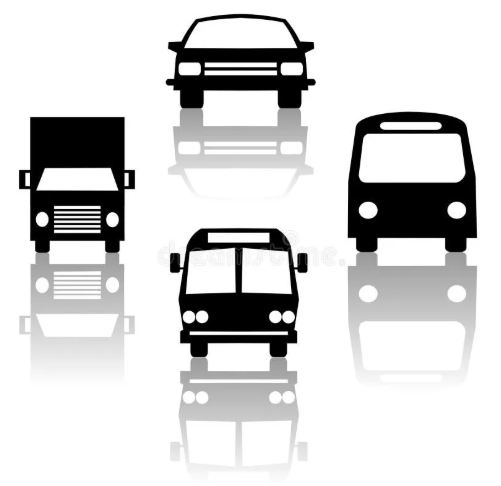

<br>

---

<br>

**Datenbeschreibung**

Die Daten, mit denen du in diesem Projekt arbeiten wirst, enthalten **Merkmale, die aus den Silhouetten von Fahrzeugen** aus unterschiedlichen Blickwinkeln extrahiert wurden.  

Anders gesagt: Alle Features sind **geometrische Eigenschaften**, die aus der Fahrzeug-Silhouette gewonnen wurden – und sie sind **numerisch**.  

Die Silhouetten-Merkmale im Datensatz beziehen sich auf **drei Fahrzeugtypen**:  
> - **Bus** (ein Doppeldeckerbus)  
> - **Van** (ein Chevrolet Van)  
> - **Auto** (entweder ein Saab 9000 oder ein Opel Manta)  

Diese Kombination wurde gewählt, weil erwartet wurde, dass **Bus**, **Van** und **Auto** grundsätzlich unterscheidbar sind –  
jedoch die **Unterscheidung zwischen den beiden Autotypen** schwieriger sein könnte.  

Der Datensatz ist hier verfügbar:  
[Datensatz](https://drive.google.com/file/d/1MnXNtmjQcFjAtM4IUrGlPY3_P820cRD3/view?usp=sharing)  

<br>

---

<br>

**Spalten im Datensatz**

Die Spalte **class** enthält das Fahrzeugmodell: *bus*, *van* oder *car*.  
Die restlichen Spalten sind **numerische Merkmale der Silhouette**.  
Auch wenn du ihre genaue Bedeutung nicht kennst, kannst du sie als numerische Beschreibungen der Form behandeln:

| **Name** | **Beschreibung** | **Datentyp** |
|-----------|------------------|--------------|
| **compactness** | Verhältnis von Fläche zu Umfang – misst, wie kompakt die Fahrzeugform ist. | `int64` |
| **circularity** | Maß, wie kreisförmig die Silhouette ist (näher an 1 = runder). | `float64` |
| **distance_circularity** | Verhältnis der mittleren zur maximalen Distanz vom Schwerpunkt – beschreibt Abweichung von Kreisform. | `float64` |
| **radius_ratio** | Verhältnis zwischen kleinstem und größtem Radius der Silhouette. | `float64` |
| **pr.axis_aspect_ratio** | Verhältnis der Hauptachsen der Form (Haupt- zu Nebenachse). | `float64` |
| **max.length_aspect_ratio** | Verhältnis der größten Seitenlänge zur kleineren – Maß für die Dehnung. | `int64` |
| **scatter_ratio** | Verhältnis der Streuung entlang der Haupt- und Nebenachse – beschreibt Verteilung der Punkte. | `float64` |
| **elongatedness** | Maß für die Länge im Verhältnis zur Breite – wie „langgezogen“ das Fahrzeug ist. | `float64` |
| **pr.axis_rectangularity** | Verhältnis der Hauptachse zur umschreibenden Rechteckhöhe. | `float64` |
| **max.length_rectangularity** | Verhältnis der maximalen Länge zur Breite des umschreibenden Rechtecks. | `int64` |
| **scaled_variance** | Skalierte Varianz der Form über die Silhouette. | `float64` |
| **scaled_variance.1** | Zweite Varianzkomponente in anderer Richtung. | `float64` |
| **scaled_radius_of_gyration** | Maß für die Massenverteilung (Radius des Trägheitsmoments). | `float64` |
| **scaled_radius_of_gyration.1** | Zweite Komponente des Trägheitsmomentradius. | `float64` |
| **skewness_about** | Schiefe (Asymmetrie) der Formverteilung. | `float64` |
| **skewness_about.1** | Schiefe um eine andere Achse. | `float64` |
| **skewness_about.2** | Dritte Schiefe-Komponente (räumlich). | `float64` |
| **hollows_ratio** | Verhältnis der „Einsenkungen“ oder Vertiefungen in der Silhouette. | `int64` |
| **class** | Zielvariable – Fahrzeugkategorie (*bus*, *van*, *car*). | `object` |

<br>

---

<br>

**Problemstellung**

Ein Netzwerk von Autowerkstätten mit dem Namen **„Prospect Auto“** hat dich gebeten, ein **Modell zu entwickeln**, das Fahrzeuge anhand ihrer **Silhouette klassifiziert**.  

🎯 **Ziel:**  
Ein Klassifikationsmodell zu erstellen, das die Fahrzeugklasse (**bus**, **van**, **car**) korrekt vorhersagen kann.  

<br>

---

<br>

**Schritte im Projekt**

Du kennst bereits den allgemeinen Ablauf eines datengetriebenen Projekts.  
Auch dieses Projekt folgt diesen Schritten:

> 1️⃣ **Importiere** alle benötigten Bibliotheken, lade den Datensatz herunter und lies ihn ein.  
> 2️⃣ **Führe eine Explorative Datenanalyse (EDA)** durch – sowohl numerisch als auch visuell.  
> 3️⃣ **Bereite die Daten** für das Modell vor, z. B. durch **Normierung/Standardisierung** und **Aufteilung in Trainings- und Testdaten**.  
> 4️⃣ **Löse das Klassifikationsproblem** mithilfe eines überwachten Lernverfahrens.  
> 5️⃣ **Wähle geeignete Metriken** zur Bewertung der Modellleistung.  
> 6️⃣ **Ziehe ein Fazit** zur Leistungsfähigkeit deines Modells und zur Frage, ob es für Klassifikationszwecke geeignet ist.

<br>




---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

---

<br>

## **Week 4: Unsupervised Machine Learning**